<a href="https://colab.research.google.com/github/armaletale/Markowitzs_modern_theory_test2/blob/master/FT9ja_Markowitz's_modern_theory_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main goal of this experiment(Model) is to perform portfolio optimization using Markowitz's Modern Portfolio Theory (MPT). Modern Portfolio Theory is a mathematical framework for constructing portfolios of assets that aim to achieve the maximum possible expected return for a given level of risk or, equivalently, to minimize risk for a given level of expected return.

Steps to be followed:

1. Download historical price data for a set of technology stocks (e.g., AAPL, GOOGL, MSFT, AMZN, MA, FB) from Yahoo Finance.
2. Calculate the daily returns of these stocks.
Compute various statistics, including mean returns and the covariance matrix of returns.
3. Simulate a large number of different portfolios (given the number of portfolios to simulate) with random allocations of these stocks.
4. For each simulated portfolio, calculate key portfolio metrics such as return, risk (volatility), and the Sharpe ratio.
5. Identify the portfolio with the highest Sharpe ratio, which represents the optimal risk-adjusted portfolio.
6. Visualize the efficient frontier, showing the trade-off between risk and return for all simulated portfolios.
7. Display the allocation (weights) of each stock in the optimal portfolio.

1. Download historical price data for a set of technology stocks (e.g., AAPL, GOOGL, MSFT, AMZN, MA) from Yahoo Finance.
- Import necessary modules

In [40]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt




2. Calculate the daily returns of these stocks. Compute various statistics, including mean returns and the covariance matrix of returns.

 - Create a list of technology stocks in the S&P 500. These are the assets that will be considered for the portfolio.
 - Download historical adjusted closing prices of the selected technology stocks from Yahoo Finance. The start and end dates define the time period of interest.
 - Calculate the daily returns for each stock. This line computes the percentage change between consecutive days and drops any rows with missing values.
 - Compute the mean returns (average daily returns) and the covariance matrix of returns for the selected stocks. These statistics are essential for portfolio optimization.

In [32]:
# List of technology stocks in the S&P 500
tech_stocks = ["AAPL", "GOOGL", "MSFT", "AMZN", "MA"]

# Download historical price data
data = yf.download(tech_stocks, start='2015-01-01', end='2022-12-31')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate mean returns and covariance of returns
mean_returns = returns.mean()
cov_matrix = returns.cov()

print(data)

[*********************100%%**********************]  5 of 5 completed
                  AAPL       AMZN      GOOGL          MA        MSFT
Date                                                                
2015-01-02   24.498684  15.426000  26.477501   81.149429   40.534843
2015-01-05   23.808516  15.109500  25.973000   78.866837   40.162094
2015-01-06   23.810759  14.764500  25.332001   78.696365   39.572620
2015-01-07   24.144632  14.921000  25.257500   79.920532   40.075413
2015-01-08   25.072334  15.023000  25.345501   81.163628   41.254353
...                ...        ...        ...         ...         ...
2022-12-23  131.299820  85.250000  89.230003  342.011322  237.112091
2022-12-27  129.477585  83.040001  87.389999  344.559479  235.354095
2022-12-28  125.504539  81.820000  86.019997  340.368958  232.940552
2022-12-29  129.059372  84.180000  88.449997  346.600037  239.376633
2022-12-30  129.378006  84.000000  88.230003  346.122223  238.194717

[2014 rows x 5 columns]


3. Simulate a large number of different portfolios (given the number of portfolios to simulate) with random allocations of these stocks.

 - Define the number of portfolios to simulate (`num_portfolios`) and set a risk-free rate (`risk_free_rate`) to be used in the Sharpe ratio calculation. Here, results is initialized as an array to store portfolio statistics.

4. For each simulated portfolio, calculate key portfolio metrics such as return, risk (`volatility`), and the Sharpe ratio.
 - Inside the loop, random portfolio weights are generated for each stock. These weights are normalized to ensure they sum up to 1, representing the allocation of each stock in the portfolio.
 - Calculate the expected portfolio return, which is the weighted sum of the mean returns of individual stocks. Also, compute the portfolio standard deviation (`volatility`), which measures risk.
 - Calculate the Sharpe ratio, which quantifies the risk-adjusted return of the portfolio by comparing it to the risk-free rate.
 - Store portfolio statistics, including return, risk, Sharpe ratio, and the weight of the stocks, in the `results` array for each portfolio.

In [36]:

# Number of portfolios to simulate
num_portfolios = 10000

results = np.zeros((8, num_portfolios))
risk_free_rate = 0.02  # Adjust as needed

for i in range(num_portfolios):
    # Generate random portfolio weights
    weights = np.random.random(len(tech_stocks))
    weights /= np.sum(weights)

    # Expected portfolio return
    portfolio_return = np.sum(mean_returns * weights)

    # Expected portfolio volatility (risk)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Sharpe ratio (risk-adjusted return)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = sharpe_ratio
    results[3, i] = weights[0]  # Store the weight of the first stock in this case
    results[4, i] = weights[1]
    results[5, i] = weights[2]
    results[6, i] = weights[3]
    results[7, i] = weights[4]

5. Identify the portfolio with the highest Sharpe ratio, which represents the optimal risk-adjusted portfolio.

 - Create a DataFrame (`portfolios`) to store the portfolio statistics, making it easier to analyze and manipulate the data.
 - Identify the portfolio with the highest Sharpe ratio (`max_sharpe_portfolio`) by finding the index of the maximum Sharpe ratio in the DataFrame.

6. Visualize the efficient frontier, showing the trade-off between risk and return for all simulated portfolios.

 -Plot the efficient frontier, which is a scatter plot showing the risk (`volatility`) on the x-axis and return on the y-axis for all simulated portfolios. Each point on the plot represents a different portfolio, and the color represents the Sharpe ratio. The portfolio with the maximum Sharpe ratio is highlighted.

Return          0.001042
Risk            0.019948
Sharpe Ratio   -0.950351
AAPL Weight     0.011062
GOOGL Weight    0.899916
MSFT Weight     0.028350
AMZN Weight     0.050502
MA Weight       0.010170
Name: 5349, dtype: float64


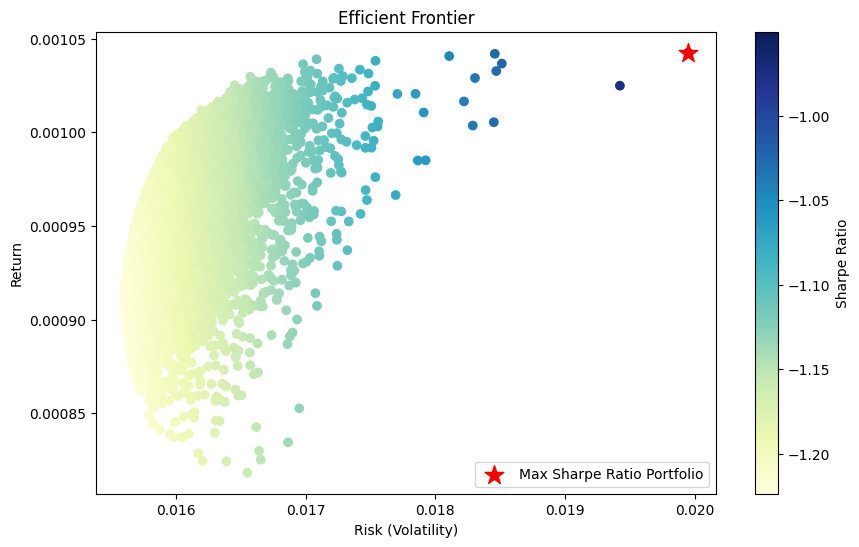

In [37]:

# Create a DataFrame to store the portfolio statistics
portfolios = pd.DataFrame(
    {
        'Return': results[0, :],
        'Risk': results[1, :],
        'Sharpe Ratio': results[2, :],
        f'{tech_stocks[0]} Weight': results[3, :],
        f'{tech_stocks[1]} Weight': results[4, :],
        f'{tech_stocks[2]} Weight': results[5, :],
        f'{tech_stocks[3]} Weight': results[6, :],
        f'{tech_stocks[4]} Weight': results[7, :]
    }
)

# Find the portfolio with the highest Sharpe ratio
max_sharpe_portfolio = portfolios.iloc[portfolios['Sharpe Ratio'].idxmax()]

print (max_sharpe_portfolio)

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Risk'], portfolios['Return'], c=portfolios['Sharpe Ratio'], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='r', marker='*', s=200, label='Max Sharpe Ratio Portfolio')
plt.legend()
plt.show()

7. Display the allocation (weights) of each stock in the optimal portfolio.

 - Display the allocation (weights) of each stock

In [38]:


# Display portfolio allocation
print("Portfolio Allocation (Weights):")
for stock in tech_stocks:
    weight = max_sharpe_portfolio[f'{stock} Weight']
    print(f"{stock}: {weight:.2%}")

# Display portfolio statistics
print("\nPortfolio Statistics:")
print(f"Expected Annual Return: {max_sharpe_portfolio['Return']:.2%}")
print(f"Annual Risk (Volatility): {max_sharpe_portfolio['Risk']:.2%}")
print(f"Sharpe Ratio: {max_sharpe_portfolio['Sharpe Ratio']:.2f}")


Portfolio Allocation (Weights):
AAPL: 1.11%
GOOGL: 89.99%
MSFT: 2.84%
AMZN: 5.05%
MA: 1.02%

Portfolio Statistics:
Expected Annual Return: 0.10%
Annual Risk (Volatility): 1.99%
Sharpe Ratio: -0.95
